**Data Loading and Exploration:**

In [107]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We first Load the heart failure dataset, separate features (X) and labels (y), display head of data, and check for missing values its clear that we dont have any missing values here.

In [108]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [109]:
X = df.iloc[:,:-1]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [110]:
y = df.iloc[:,-1:]
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [111]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [112]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We now Visualize the distribution of "age" variable, scatter plot of "age" vs. "diabetes", and a boxplot of "diabetes" across "sex".

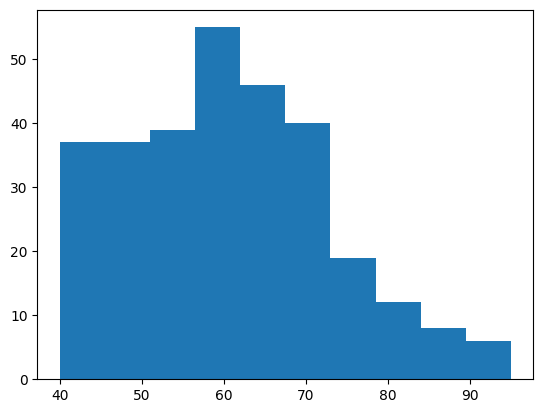

In [113]:
import matplotlib.pyplot as plt
plt.hist(df["age"])
plt.show()

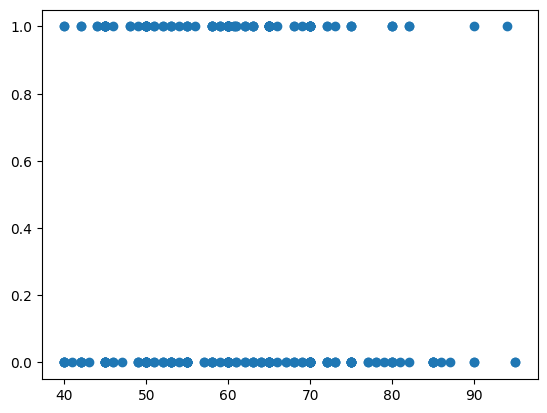

In [114]:
plt.scatter(df["age"], df["diabetes"])
plt.show()

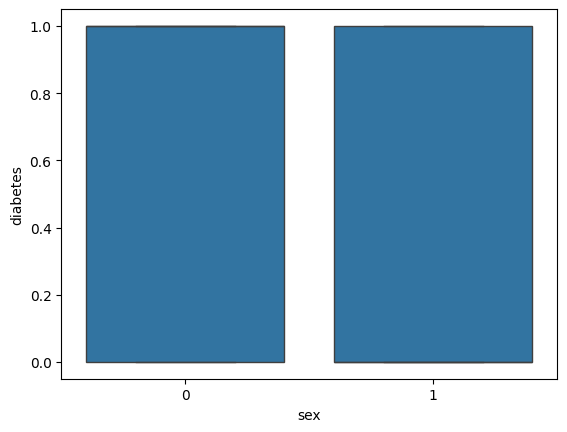

In [115]:
import seaborn as sns
sns.boxplot(x="sex", y="diabetes", data=df)
plt.show()

We now Create a correlation heatmap for all features.

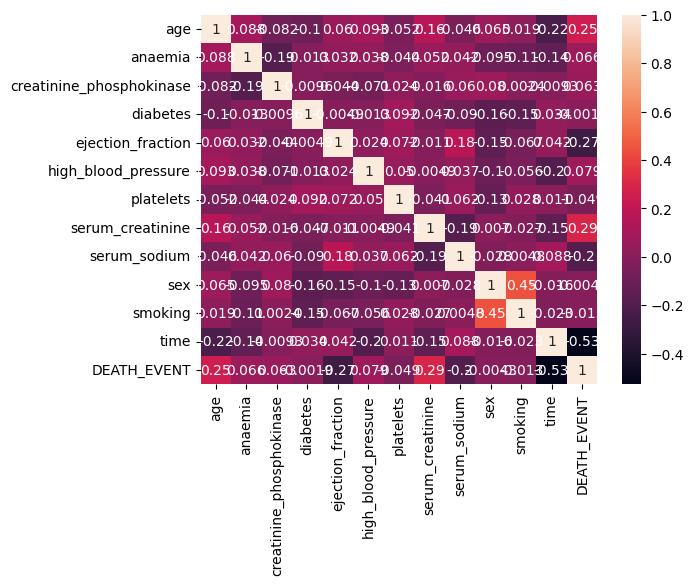

In [116]:
Corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Below is the regression plot to visually analyze the relationship between "diabetes" and "DEATH_EVENT

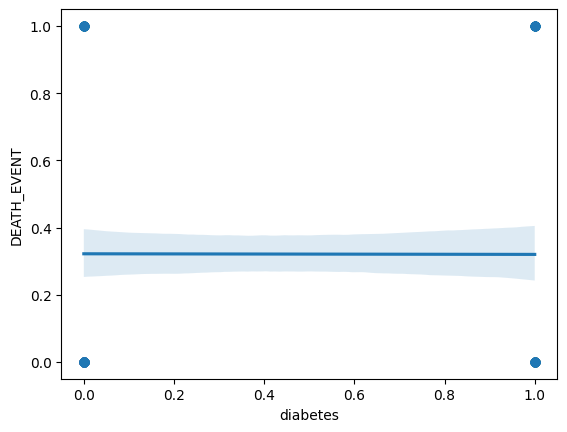

In [117]:
sns.regplot(x="diabetes", y="DEATH_EVENT", data=df)
plt.show()


Splitting the data into training (80%) and testing (20%) sets.

In [118]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training an SVM classifier and a Random Forest classifier on the training set.


In [119]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

<ipython-input-120-8dce7a5d6ae1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Combine predictions by taking the mode (most frequent prediction) between SVM and RF for each test sample.

In [121]:
combined_predictions = []
for i in range(len(X_test)): combined_predictions.append(max(set([svm_predictions[i], rf_predictions[i]]), key = svm_predictions[i:].tolist().count))

In [122]:
accuracy_combined = accuracy_score(y_test, combined_predictions)
print(f"Accuracy of the combined model: {accuracy_combined}")

Accuracy of the combined model: 0.7166666666666667


Calculate and print classification report, ROC AUC, Cohen's kappa, and Matthews correlation coefficient.

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
report = classification_report(y_test, combined_predictions)
print(f"Classification report:\n{report}")
fpr, tpr, thresholds = roc_curve(y_test, combined_predictions)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")
kappa = cohen_kappa_score(y_test, combined_predictions)
mcc = matthews_corrcoef(y_test, combined_predictions)
print(f"Cohen's kappa: {kappa}")
print(f"Matthews correlation coefficient: {mcc}")

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60

ROC AUC: 0.6771428571428572
Cohen's kappa: 0.3780487804878049
Matthews correlation coefficient: 0.4129664150778532


Plotting a confusion matrix to visualize true vs. predicted labels.


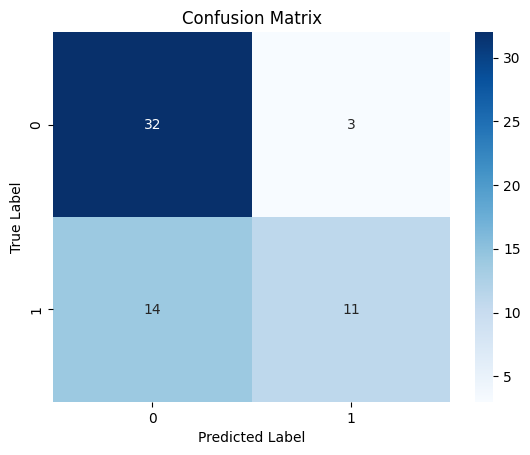

In [124]:
cm = confusion_matrix(y_test, combined_predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Create a ROC curve to visualize the model's performance for different classification thresholds.


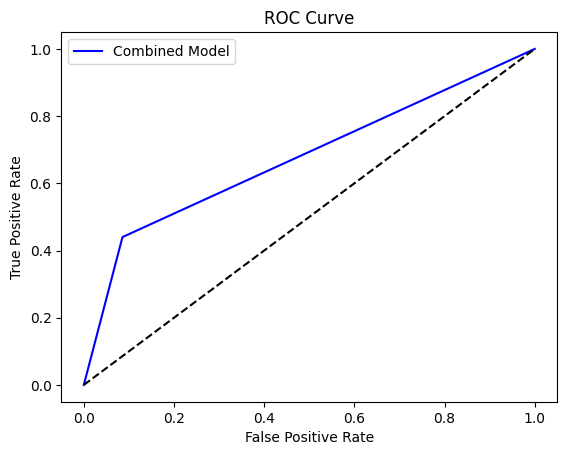

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, combined_predictions)
plt.plot(fpr, tpr, label="Combined Model", color="blue")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Overall, the above code performs the following:**

*   Loads and explores the heart failure dataset.

*   Trains separate SVM and Random Forest classifiers.


*   Combines predictions for improved accuracy.
*   Evaluates the combined model using multiple metrics.
*   
Visualizes results with confusion matrix and ROC curve.
